In [ ]:
# Load Latest Model
# Load Image from Sentinel 
# Predict and Infer Changes

In [37]:
import sys
sys.path.append('src')
from src.trainer import EuroSATTrainer
from src.load_data import get_eurosat_dataloaders
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [2]:
train_loader, valid_loader, label_dict = get_eurosat_dataloaders(batch_size = 10, limit=100, test_size = .1)

100%|██████████| 100/100 [00:00<00:00, 206311.07it/s]


In [3]:
for batch in train_loader:
    break

In [4]:
batch[1].shape

torch.Size([10])

tensor(0.2968)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '/Industrial')

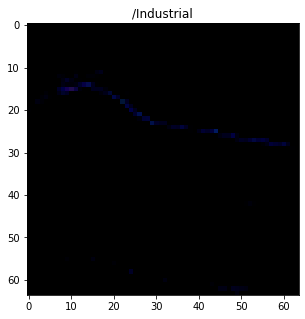

In [28]:
plt.figure(figsize=(5,5))
plt.imshow(batch[0][4].permute(1,2,0))
plt.title(label_dict[batch[1][2].item()])

In [10]:
best_model_path = 'bin/epoch=34-step=9869.ckpt'
model = EuroSATTrainer.load_from_checkpoint(best_model_path)

In [13]:

if torch.cuda.is_available():
    model.cuda(); # if available!

model.eval();
with torch.no_grad():
    y_pred = model(batch[0].cuda())

In [14]:
y_pred = model(batch[0].cuda())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /media/nvidia/NVME/pytorch/pytorch-v1.9.0/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [20]:
[label_dict[i.item()] for i in y_pred.argmax(axis=1).detach().cpu()]

['/Residential',
 '/PermanentCrop',
 '/Industrial',
 '/PermanentCrop',
 '/Pasture',
 '/Industrial',
 '/River',
 '/HerbaceousVegetation',
 '/River',
 '/River']

In [21]:
[label_dict[i.item()] for i in batch[1]]

['/Residential',
 '/PermanentCrop',
 '/Industrial',
 '/Pasture',
 '/PermanentCrop',
 '/Industrial',
 '/River',
 '/HerbaceousVegetation',
 '/River',
 '/River']

In [32]:
from PIL import Image

In [34]:
img = Image.open('data/2750/Forest/Forest_1.jpg')

In [36]:
img.getdata()

In [42]:
np.asarray(img).min()

29